- $d\geq 2$ is the input data dimension
- $k$ is the number of cluster per dimensions (over $2$ dimensions)
- $n$ is the number of training samples
- $m$ is the number of neurons
- $p$ is cluster labels
- sd number of spurious dimensions

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import torch
from torch.utils.data import TensorDataset, DataLoader

In [2]:
from scripts.architecture import MLP, MLPManual
from scripts.train_utils import AverageMeter, accuracy
from scripts.plot_utils import plot_loss_accuracy, plotValAccuracy, fillSubplot
from scripts.optimizer import Optimizer
from scripts.train import *
from scripts.data import * 

In [3]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
          'figure.figsize': (16, 8),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pylab.rcParams.update(params)

In [4]:
k = 3
d = 5
sd = d - 3
n = 256
n_test = 4000

In [5]:
num_epochs = 500
learning_rate = 0.5
loss_type = "Binary Cross Entropy"
loss_fn = torch.nn.BCELoss()
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
batch_size = 1000
optim = "SGD"
measure_alignment = False
momentum, nesterov_momentum = False, False
weight_decay = None

In [ ]:
modelManual = MLPManual(d, learning_rate, loss_type, "BP", None, optim, device, measure_alignment, True, False)
trainLostList_sgd1_scratch, trainAccList_sgd1_scratch, \
valLossList_sgd1_scratch, valAccList_sgd1_scratch,_,_  = train_model_manually(modelManual, k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, momentum,
                                                                         nesterov_momentum, weight_decay, measure_alignment, n,d, validate_model = True, device=device, data="random")

plot_loss_accuracy(trainLostList_sgd1_scratch,valLossList_sgd1_scratch,trainAccList_sgd1_scratch,valAccList_sgd1_scratch,num_epochs)

In [ ]:
modelManual = MLPManual(d, learning_rate, loss_type, "BP", None, optim, device, measure_alignment, False, False)

trainLostList_sgd1_scratch, trainAccList_sgd1_scratch, \
valLossList_sgd1_scratch, valAccList_sgd1_scratch,_,_  = train_model_manually(modelManual, k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, momentum,
                                                                         nesterov_momentum, weight_decay, measure_alignment, n,d, validate_model = True, device=device, data="random")

plot_loss_accuracy(trainLostList_sgd1_scratch,valLossList_sgd1_scratch,trainAccList_sgd1_scratch,valAccList_sgd1_scratch,num_epochs)

In [ ]:
modelManual = MLPManual(d, learning_rate, loss_type, "DFA", "uniform", optim, device, measure_alignment, True, False)

trainLostList_sgd1_scratch, trainAccList_sgd1_scratch, \
valLossList_sgd1_scratch, valAccList_sgd1_scratch,_,_  = train_model_manually(modelManual, k, trainset, testset, loss_type, loss_fn, num_epochs, batch_size, momentum,
                                                                         nesterov_momentum, weight_decay, measure_alignment, n,d, validate_model = True, device=device, data="random")

plot_loss_accuracy(trainLostList_sgd1_scratch,valLossList_sgd1_scratch,trainAccList_sgd1_scratch,valAccList_sgd1_scratch,num_epochs)

In [6]:
num_epochs = 500
ns = [32,64,128,256,512]
n_test = 4000

In [7]:
d = 15 # similar to paper
sd = d - 3
idx = 0
n_max = max(ns)
df = pd.DataFrame(columns=["Test Accuracy", "n", "Method"])

for i in range(1,4): 
    trainset, testset = randomData(k, n_max, n_test, sd)
    for n in ns:
        print("Number of data points:", n)
        modelManual1 = MLPManual(d, learning_rate, loss_type, "BP", None, optim, device, measure_alignment, True, False)
        modelManual2 = MLPManual(d, learning_rate, loss_type, "BP", None, optim, device, measure_alignment, False, False)
        modelManual3 = MLPManual(d, learning_rate, loss_type, "DFA", "uniform", optim, device, measure_alignment, True, False)
        modelManual4 = MLPManual(d, learning_rate, loss_type, "DFA", "uniform", "RMSProp", device, measure_alignment, True, False)
        results = {}
        for model in [modelManual1, modelManual2, modelManual3, modelManual4]:    
            trainLostList_sgd1_scratch1, trainAccList_sgd1_scratch1, \
            valLossList_sgd1_scratch1, valAccList_sgd1_scratch1,_,_  = train_model_manually(model, k, trainset, testset, loss_type, loss_fn, num_epochs, n, momentum,
                                                                                    nesterov_momentum, weight_decay, measure_alignment, n,d, validate_model = True, device=device,
                                                                                    data="random")
            results[i] = valAccList_sgd1_scratch1

            liste = []
            for i in results:
                liste.append(results[i][-1])

            method = model.train_method + "_" + model.optim + "_" + str(model.update_both)

            for value in liste:
                df.loc[idx,:] = [value, n, method]
                idx += 1

df["Error"] = df["Test Accuracy"].apply(lambda x: 1-x)
df.to_csv("runs/randomData_n.csv", index=False)

Number of data points: 32
Training on cuda:0
Training method BP and optimizer SGD
Training both layers True
Epoch 1 completed. Loss - total: 22.2292 - average: 0.6947; Performance: 0.4688
TESTING - loss 2726.6600728034973 - performance 0.5825
Epoch 2 completed. Loss - total: 19.7670 - average: 0.6177; Performance: 0.9375
TESTING - loss 2663.0807518959045 - performance 0.6002
Epoch 3 completed. Loss - total: 17.8601 - average: 0.5581; Performance: 0.8750
TESTING - loss 2663.901388645172 - performance 0.5960
Epoch 4 completed. Loss - total: 16.3430 - average: 0.5107; Performance: 0.8750
TESTING - loss 2648.8301157951355 - performance 0.5995
Epoch 5 completed. Loss - total: 15.1079 - average: 0.4721; Performance: 0.8750
TESTING - loss 2665.251314640045 - performance 0.5990
Epoch 6 completed. Loss - total: 14.0821 - average: 0.4401; Performance: 0.8750
TESTING - loss 2676.2999296188354 - performance 0.5988
Epoch 7 completed. Loss - total: 13.2155 - average: 0.4130; Performance: 0.8750
TEST

In [7]:
# julia code, learning rate is 0.5, num_epochs are 50k, n_test 4000
n = 256
ds = [5,10,15,20,25]
num_epochs = 500

In [8]:
idx = 0
df = pd.DataFrame(columns=["Test Accuracy", "d", "Method"])
sd = max(ds) - 3

for i in range(1,4):  
    trainset, testset = randomData(k, n, n_test, sd)
    for d in ds:
        print("Number of dimensions points:", d)
        modelManual1 = MLPManual(d, learning_rate, loss_type, "BP", None, optim, device, measure_alignment, True, False)
        modelManual2 = MLPManual(d, learning_rate, loss_type, "BP", None, optim, device, measure_alignment, False, False)
        modelManual3 = MLPManual(d, learning_rate, loss_type, "DFA", "uniform", optim, device, measure_alignment, True, False)
        modelManual4 = MLPManual(d, learning_rate, loss_type, "DFA", "uniform", "RMSProp", device, measure_alignment, True, False)
            
        results = {} 
        for model in [modelManual1, modelManual2, modelManual3, modelManual4]:
            trainLostList_sgd1_scratch1, trainAccList_sgd1_scratch1, \
            valLossList_sgd1_scratch1, valAccList_sgd1_scratch1,_,_  = train_model_manually(model, k, trainset, testset, loss_type, loss_fn, num_epochs, n, momentum,
                                                                                    nesterov_momentum, weight_decay, measure_alignment, n,d, validate_model = True, device=device,
                                                                                    data="random")
            results[i] = valAccList_sgd1_scratch1

            liste = []
            for i in results:
                liste.append(results[i][-1])

            method = model.train_method + "_" + model.optim + "_" + str(model.update_both)

            for value in liste:
                df.loc[idx,:] = [value, d, method]
                idx += 1

df["Error"] = df["Test Accuracy"].apply(lambda x: 1-x)
df.to_csv("runs/randomData_d.csv", index=False)

Number of dimensions points: 5
Training on cuda:0
Training method BP and optimizer SGD
Training both layers True
Epoch 1 completed. Loss - total: 174.8065 - average: 0.6828; Performance: 0.5625
TESTING - loss 2646.7109322547913 - performance 0.6010
Epoch 2 completed. Loss - total: 168.5522 - average: 0.6584; Performance: 0.6172
TESTING - loss 2624.173939228058 - performance 0.6703
Epoch 3 completed. Loss - total: 165.9510 - average: 0.6482; Performance: 0.6680
TESTING - loss 2702.8074264526367 - performance 0.5780
Epoch 4 completed. Loss - total: 171.6979 - average: 0.6707; Performance: 0.5977
TESTING - loss 3827.860176563263 - performance 0.4350
Epoch 5 completed. Loss - total: 240.2043 - average: 0.9383; Performance: 0.4375
TESTING - loss 8174.578070640564 - performance 0.5650
Epoch 6 completed. Loss - total: 529.4714 - average: 2.0682; Performance: 0.5625
TESTING - loss 5880.264401435852 - performance 0.4350
Epoch 7 completed. Loss - total: 368.3557 - average: 1.4389; Performance: 0

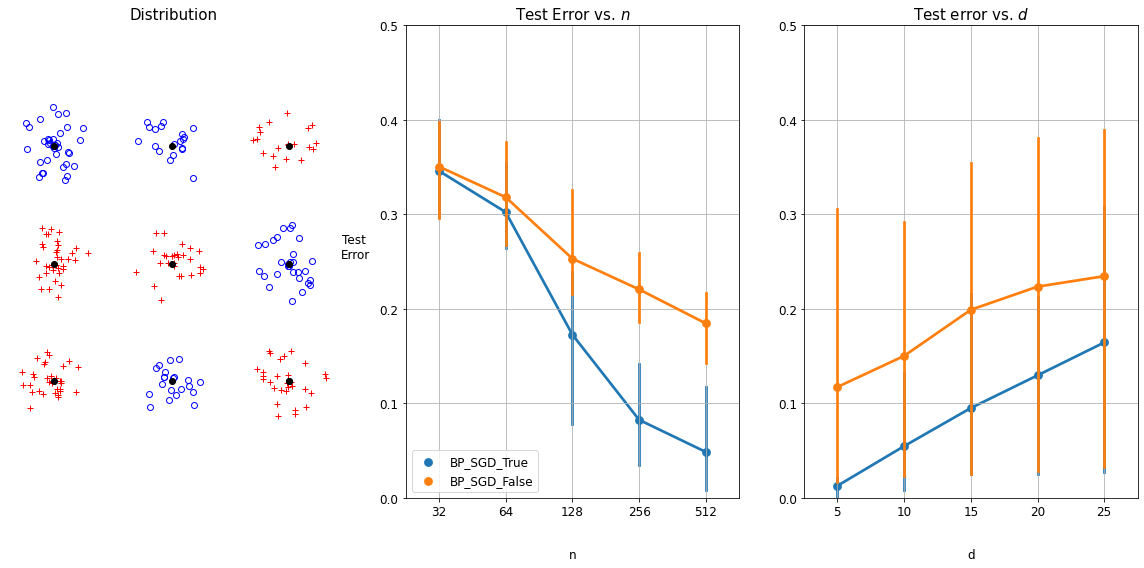

In [9]:
# reproduced experiment from paper
trainset, testset = randomData(k, n, n_test, sd)
X1 = trainset[:][0][trainset[:][1] == 1, :]
X2 = trainset[:][0][trainset[:][1] == 0, :]

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,8))
ax1.plot(X1[:,1],X1[:,2],"+r")
ax1.plot(X2[:,1],X2[:,2],"ob", markerfacecolor='none')
ax1.plot(cluster_center(torch.arange(0,k**2+1),k)[0],cluster_center(torch.arange(0,k**2+1),k)[1],"ok")
ax1.set_title("Distribution", fontsize=15)
ax1.axis("equal")
ax1.axis("off")


df_n = pd.read_csv("runs/randomData_n.csv")
df_n = df_n[df_n["Method"].apply(lambda x: "DFA" not in x)]
g = sns.pointplot(data=df_n, x="n", y="Error", hue="Method", alpha=.6, ax=ax2)
g.legend_.set_title(None)
ax2.legend(loc=3)
ax2.set_ylabel("Test \nError", rotation=0, fontsize=12, labelpad=30)
ax2.yaxis.set_label_coords(-0.15,0.5)
ax2.set_xlabel("n", rotation=0, fontsize=12, labelpad=30)
ax2.grid()
ax2.set_title("Test Error vs. $n$", fontsize=15)
ax2.set_ylim(0,0.5)
ax2.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])


df_d = pd.read_csv("runs/randomData_d.csv")
df_d = df_d[df_d["Method"].apply(lambda x: "DFA" not in x)]
g = sns.pointplot(data=df_d, x="d", y="Error", hue="Method", alpha=.6, ax=ax3)
ax3.get_legend().remove()
ax3.set_ylabel("")
ax3.set_xlabel("d", rotation=0, fontsize=12, labelpad=30)
ax3.grid()
ax3.set_title("Test error vs. $d$", fontsize=15)
ax3.set_ylim(0,0.5)
ax3.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5]);

fig.tight_layout()
fig.savefig("plots/randomData_reproduced.png")

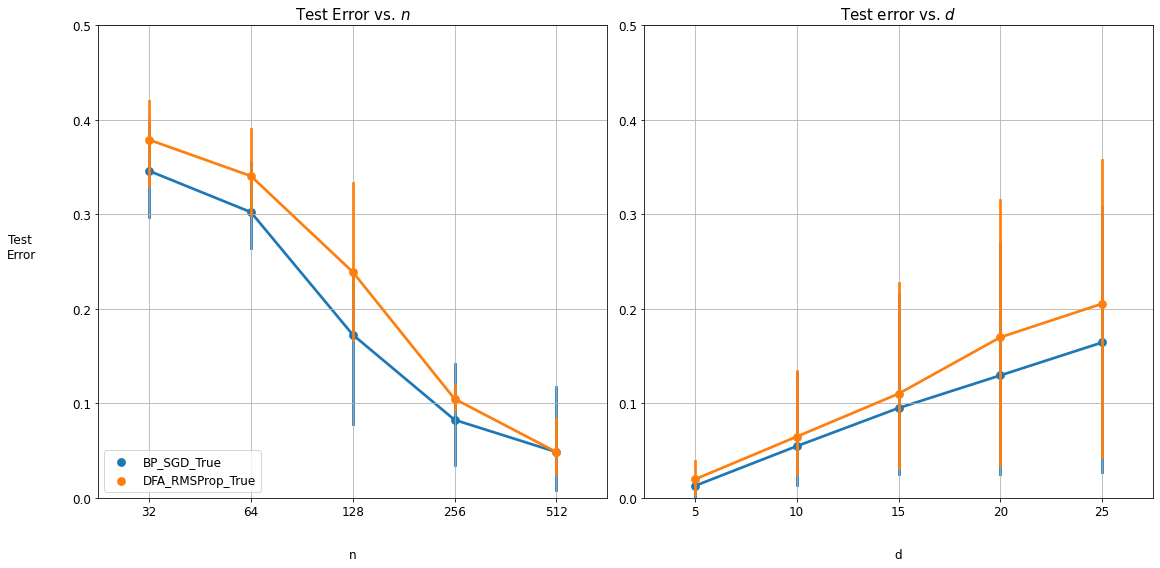

In [11]:
fig, (ax2, ax3) = plt.subplots(1, 2, figsize=(16,8))

df_n = pd.read_csv("runs/randomData_n.csv")
df_n = df_n[(df_n["Method"] == "BP_SGD_True") | (df_n["Method"] == "DFA_RMSProp_True")]
g = sns.pointplot(data=df_n, x="n", y="Error", hue="Method", alpha=.6, ax=ax2)
g.legend_.set_title(None)
ax2.legend(loc=3)
ax2.set_ylabel("Test \nError", rotation=0, fontsize=12, labelpad=30)
ax2.yaxis.set_label_coords(-0.15,0.5)
ax2.set_xlabel("n", rotation=0, fontsize=12, labelpad=30)
ax2.grid()
ax2.set_title("Test Error vs. $n$", fontsize=15)
ax2.set_ylim(0,0.5)
ax2.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])


df_d = pd.read_csv("runs/randomData_d.csv")
df_d = df_d[(df_d["Method"] == "BP_SGD_True") | (df_d["Method"] == "DFA_RMSProp_True")]
g = sns.pointplot(data=df_d, x="d", y="Error", hue="Method", alpha=.6, ax=ax3)
ax3.get_legend().remove()
ax3.set_ylabel("")
ax3.set_xlabel("d", rotation=0, fontsize=12, labelpad=30)
ax3.grid()
ax3.set_title("Test error vs. $d$", fontsize=15)
ax3.set_ylim(0,0.5)
ax3.set_yticks([0.0, 0.1, 0.2, 0.3, 0.4, 0.5]);

fig.tight_layout()
fig.savefig("plots/randomData_experiment.png")
# not really understandable, maybe go for with the table?